### FLIGHT PRICE PREDICTION
-- DONE BY SOUMYADEEP SENGUPTA <br/>
a kaggle project <br/>
data source : "https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh?select=Data_Train.xlsx"

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


import warnings

warnings.filterwarnings('ignore')

In [4]:
sns.set()

In [8]:
#IMPORT DATA

data = pd.read_excel("Data_Train.xlsx", sheet_name=0)
pd.set_option("display.max_columns", None)

In [9]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### Data preprocessing


In [16]:
#check Num of missing values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

there is very few amount of null value present there we have to check that

In [14]:
data.shape

(10683, 11)

In [18]:
data.dropna(inplace=True)

In [20]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [21]:
data.shape

(10682, 11)

###### NOTE:
Duration : column has 2hrs 15 min so we have to preprocess the value
    

In [22]:
data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
3h 25m       1
41h 20m      1
42h 45m      1
32h 55m      1
33h 20m      1
Name: Duration, Length: 368, dtype: int64

We can see the data columns 
- ` Date_of journey` --> In String format we have to convert to date time format
- `Dep_time` -->In String format we have to process 
- `Arraival_Time` --> in string format 
- `Duration` --> In String format we have to process 



In [29]:
#import datetime as dt 
data["Journey_Day"] = pd.to_datetime(data.Date_of_Journey , format= "%d/%m/%Y").dt.day

In [31]:
data["Journey_Month"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [33]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [34]:
#Now drop DAte_of_Journey
data.drop(['Date_of_Journey'] , axis=1 , inplace=True)

In [37]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [41]:
#extract data from depture time

data["Dept_hour"] = pd.to_datetime(data.Dep_Time ).dt.hour
data["Dept_minute"] = pd.to_datetime(data.Dep_Time ).dt.minute

In [43]:
data.drop(["Dep_Time"] ,axis=1 , inplace=True)

In [44]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dept_hour,Dept_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [45]:
# similerly work with arrival time
data["Arr_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour
data["Arr_minute"] = pd.to_datetime(data.Arrival_Time ).dt.minute
data.drop(["Arrival_Time"] ,axis=1 , inplace=True)

In [46]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dept_hour,Dept_minute,Arr_hour,Arr_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [62]:
# Preprocessing for duration


#below customised function is for to create "2h" to "2h 0m" form

duration = list(data.Duration)
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i] =duration[i].strip() + ' 0m'
        else:
            duration[i]= "0h "+ duration[i].strip()
            
duration_hours=[]
duration_min=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_min.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

In [64]:
data['Duration_hours'] = duration_hours
data['Duration_min'] = duration_min
data.drop(['Duration'] , axis=1 , inplace=True)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dept_hour,Dept_minute,Arr_hour,Arr_minute,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


##### Handling Categorical Data

1. Nominal Data (data dont have any order i.e state) -> OneHotEncoder
2. Ordinal Data (Data are in Order ie. ranking) -> LabelEncoder

In [66]:
data.Airline.value_counts()  #Nominal Data -> OneHot encoding to convert norminal data to numarical data

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

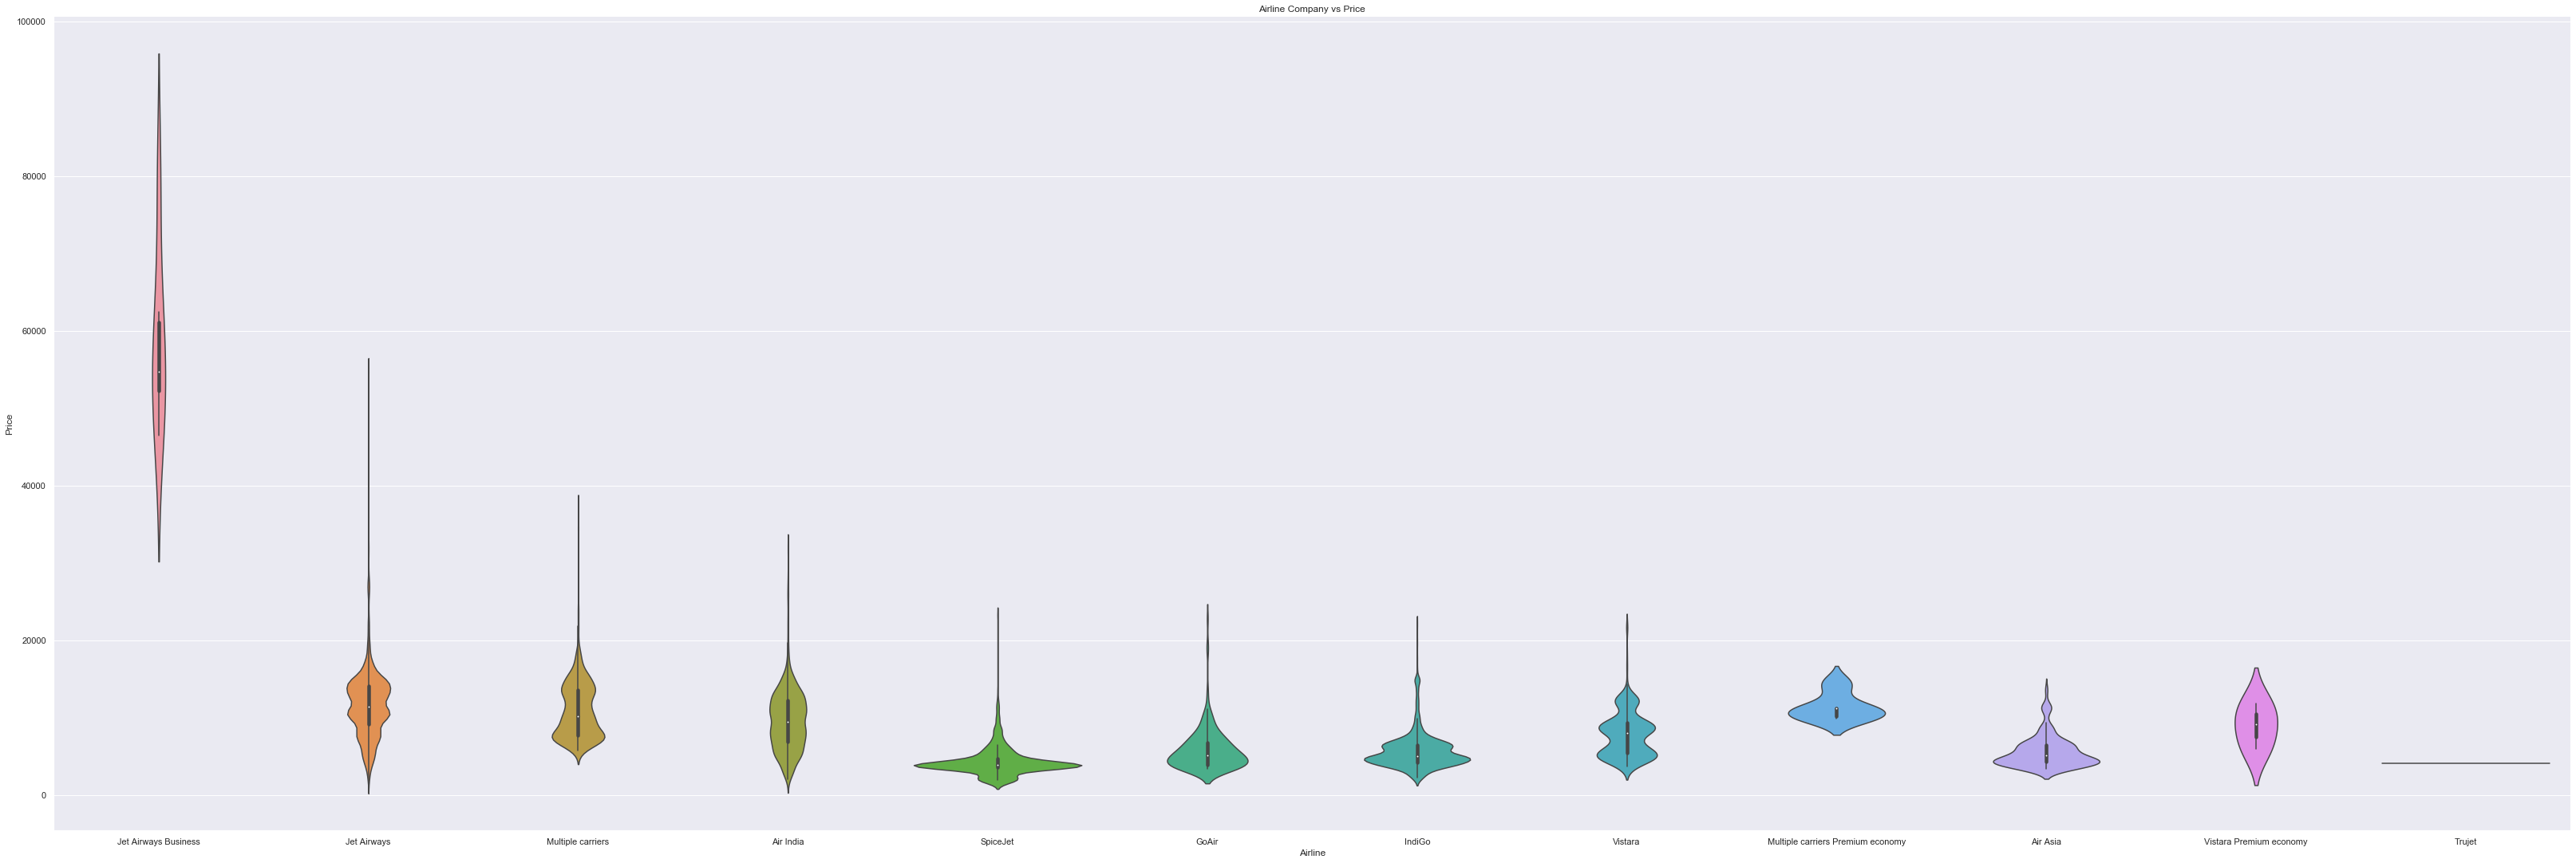

In [83]:
# NOW DRAW CATEGORY DATA AND COMPARE WITH PRICE -> TO SEE WHICH AIRWAYS COMPANY HAS HIGH -LOW PRICE

sns.catplot(y = "Price" , x = 'Airline' ,data = data.sort_values('Price' , ascending = False) ,kind='violin',height = 15 , aspect=3)
plt.title("Airline Company vs Price")

plt.show()

we can see `Jet airways` has the highest price in this segment

In [89]:
#As Airline is a Nominal Categorical data we will perform one hot encoding

Airline = data[['Airline']]
Airline = pd.get_dummies(Airline , drop_first=True)
print(type(Airline))
Airline.head()

<class 'pandas.core.frame.DataFrame'>


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [91]:
data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [92]:
#As Source is a Nominal Categorical data we will perform one hot encoding

source = data[['Source']]
source = pd.get_dummies(source , drop_first=True)
print(type(source))
source.head()

<class 'pandas.core.frame.DataFrame'>


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


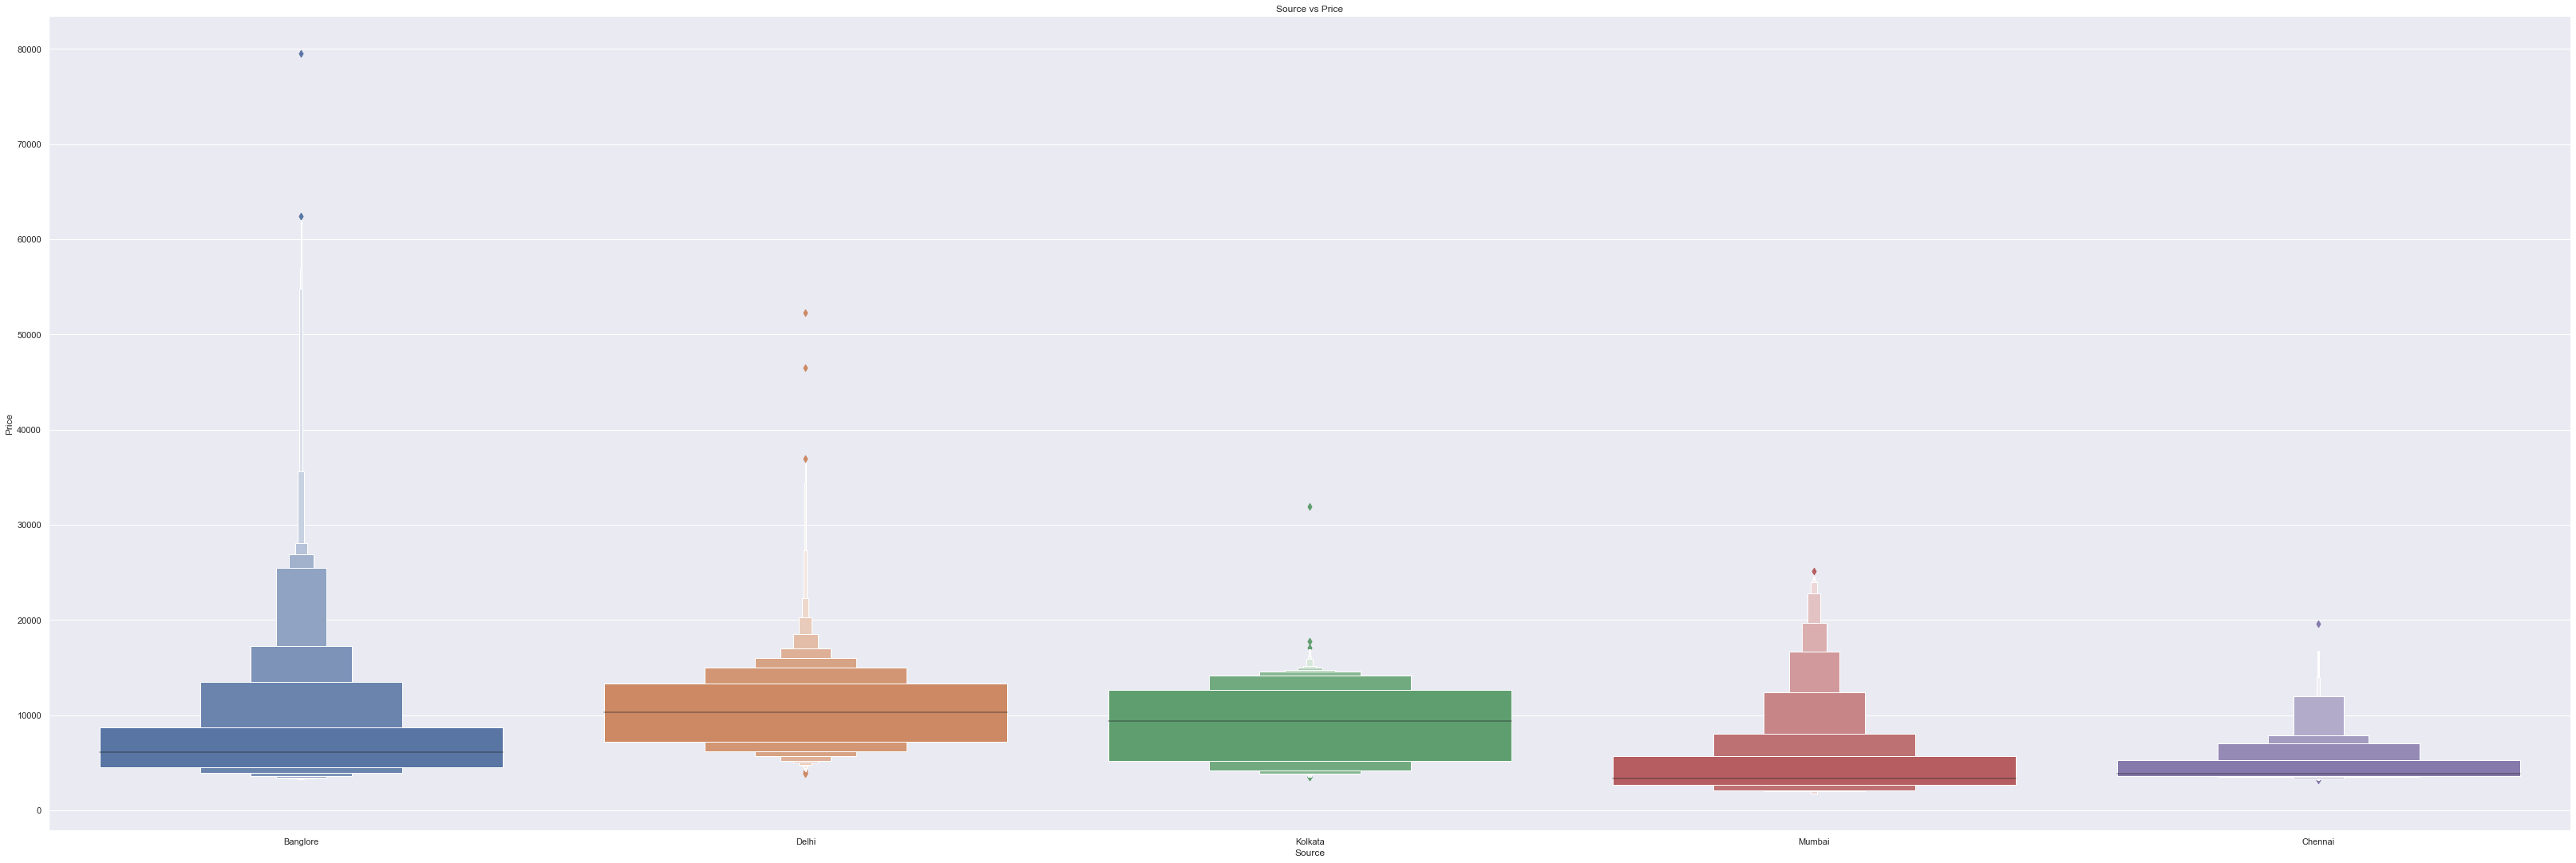

In [98]:
# NOW DRAW CATEGORY DATA AND COMPARE WITH PRICE -> TO SEE WHICH Source HAS HIGH -LOW PRICE

sns.catplot(y = "Price" , x = 'Source' ,data = data.sort_values('Price' , ascending = False) ,kind='boxen',height = 15 , aspect=3)
plt.title("Source vs Price")

plt.show()

In [99]:
data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [101]:
#As Destination is a Nominal Categorical data we will perform one hot encoding

dest = data[['Destination']]
dest = pd.get_dummies(dest , drop_first=True)

dest.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


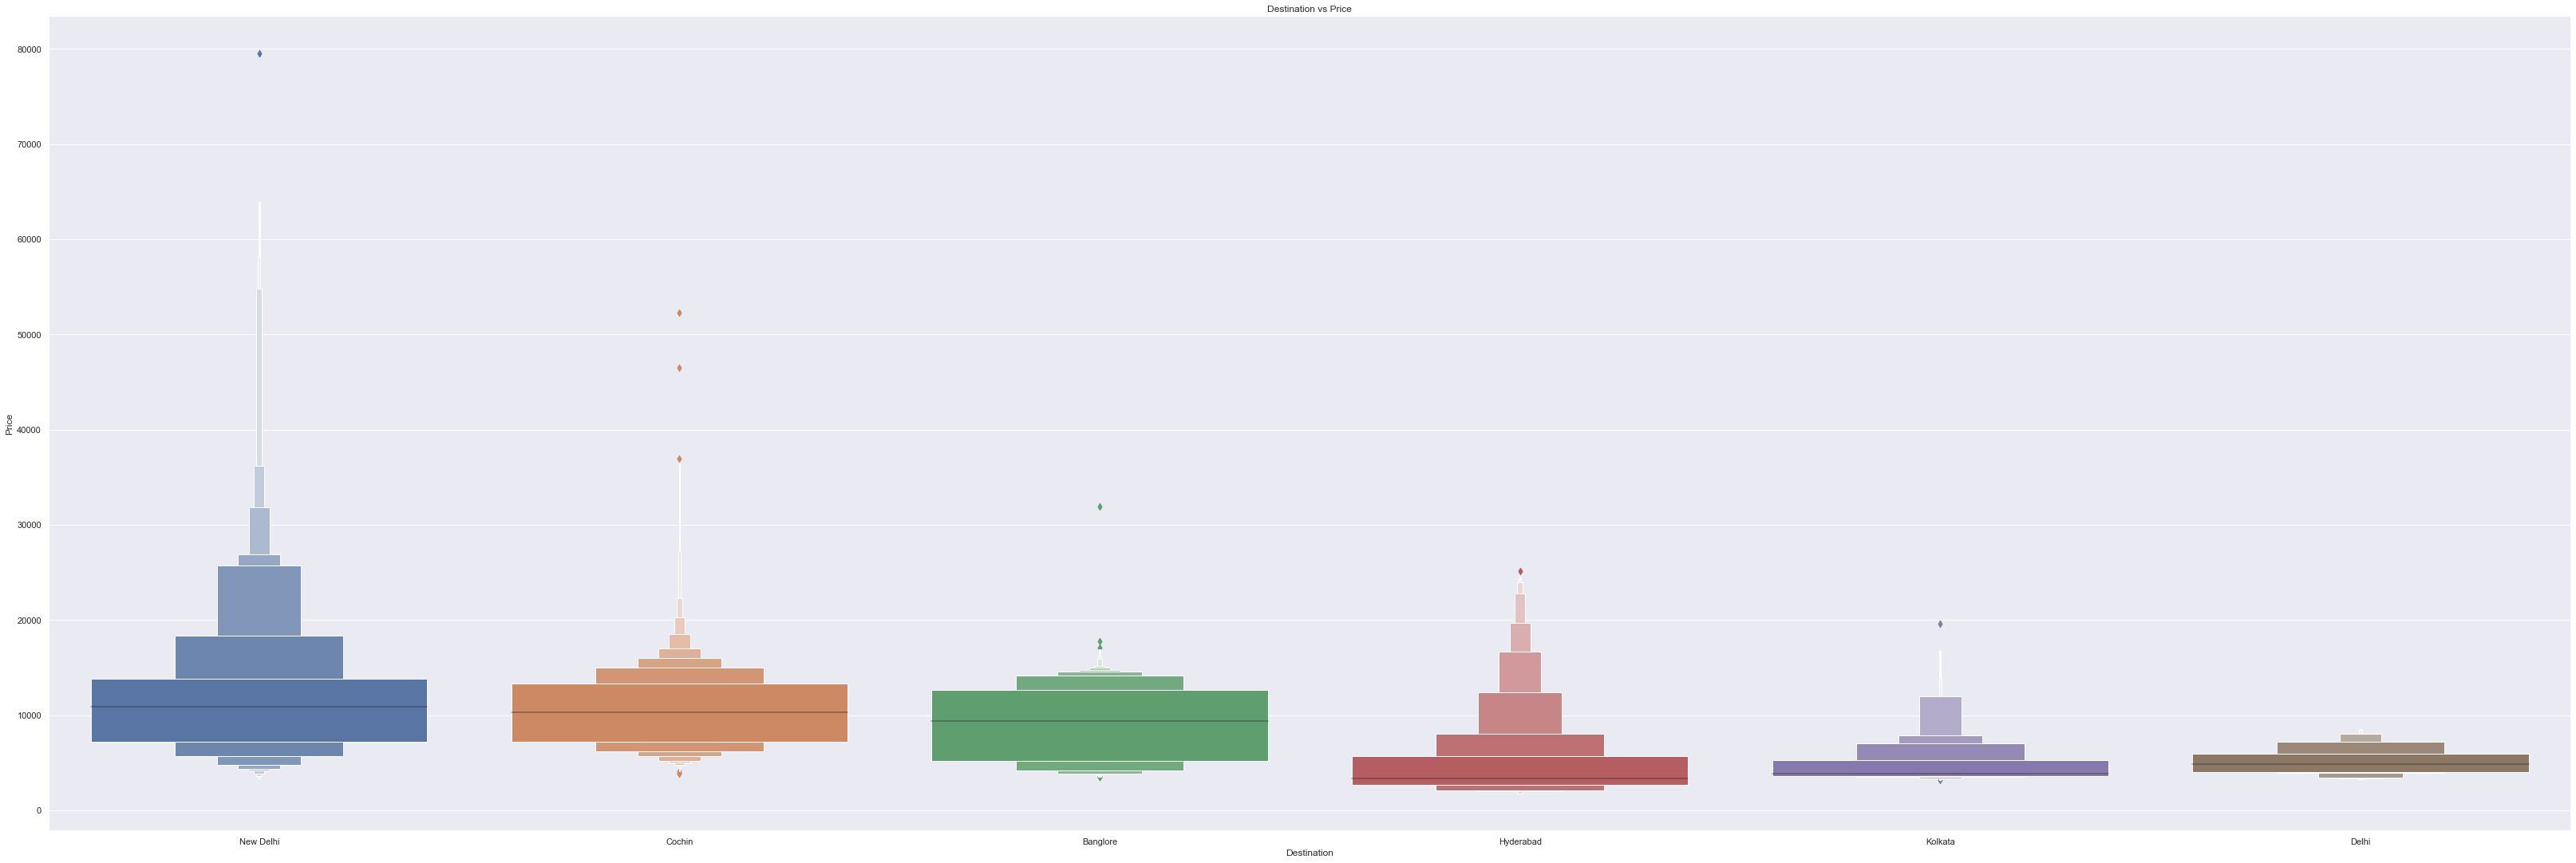

In [102]:
# NOW DRAW CATEGORY DATA AND COMPARE WITH PRICE -> TO SEE WHICH Source HAS HIGH -LOW PRICE

sns.catplot(y = "Price" , x = 'Destination' ,data = data.sort_values('Price' , ascending = False) ,kind='boxen',height = 15 , aspect=3)
plt.title("Destination vs Price")

plt.show()

In [103]:
data.Route


0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [104]:
data.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

We can see `route` is similar to the stops and most of the additional info is No info so we are dropping the colums

In [105]:
data.drop(['Route','Additional_Info'], axis=1 , inplace=True)

In [106]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dept_hour,Dept_minute,Arr_hour,Arr_minute,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [107]:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [111]:
#Here Stop is a ordinal value so we will do levelencoding
data.replace({'non-stop':0 ,'1 stop':1, '2 stops':2 , '3 stops' : 3 , '4 stops' : 4 } , inplace=True)

In [112]:
data.Total_Stops.value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

Now concatinate all the Categorical data with the main dataset

In [113]:
data = pd.concat([data,Airline,source,dest] , axis=1)

In [114]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dept_hour,Dept_minute,Arr_hour,Arr_minute,Duration_hours,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [115]:
data.drop(["Airline","Source","Destination"], inplace=True , axis=1)

In [116]:
data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dept_hour,Dept_minute,Arr_hour,Arr_minute,Duration_hours,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [117]:
data.shape

(10682, 30)